In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
def plot_series(time,series,format="-",start=0,end=None,label=None):
    plt.plot(time[start:end], series[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

    
def trend(time,slope=0):
    return slope*time
    


In [6]:
#upword trend
time = np.arange(4*365+1)
baseline = 10
series = baseline + trend(time,slope=0.1)

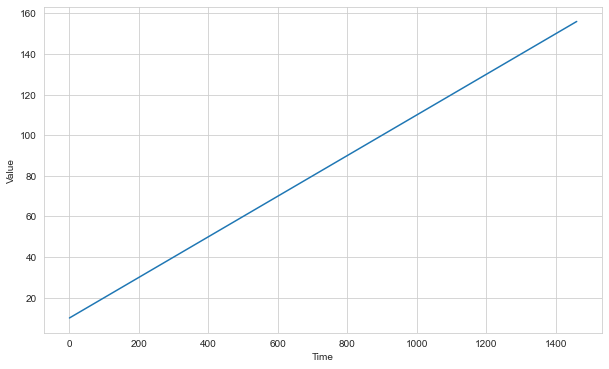

In [7]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [8]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [9]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

In [11]:
#seasonal Data
def seasonal_pattern(season_time):
    return np.where(season_time< 0.4,np.cos(season_time*2*np.pi),
                   1/np.exp(3*season_time))

In [12]:
def seasonality(time,period,amplitude=1,phase=0):
    season_time = ((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

In [13]:
amplitude = 40
series = seasonality(time,period=365,amplitude=amplitude)

In [14]:
series

array([40.        , 39.99407357, 39.97629603, ...,  2.02448999,
        2.00791854, 40.        ])

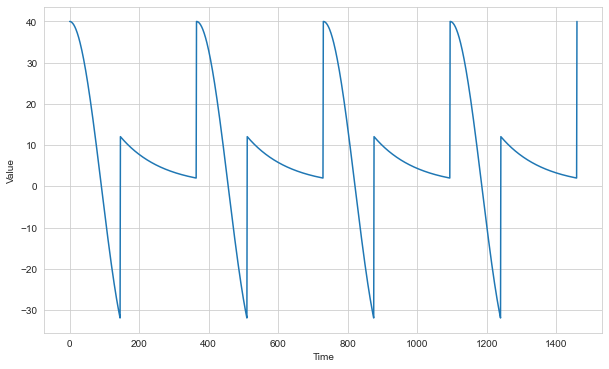

In [15]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [16]:
# trend + seasonality

slope = 0.05
series = baseline + trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)

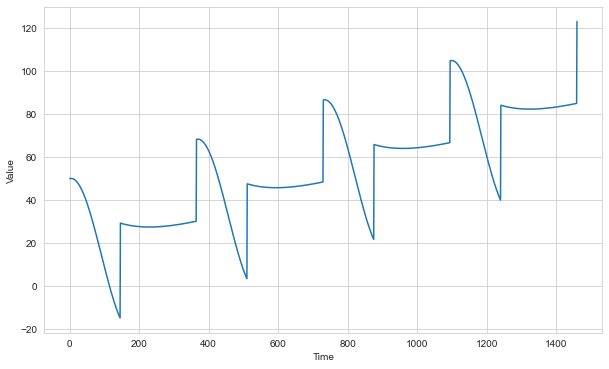

In [17]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [18]:
# noise
def white_noise(time,noise_level=1,seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


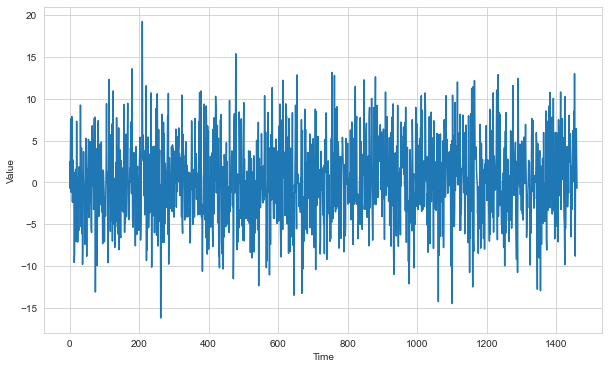

In [19]:
noise_level = 5
noise = white_noise(time,noise_level,seed=42)
plt.figure(figsize=(10,6))
plot_series(time,noise)
plt.show()